In [ ]:
from scipy.sparse.linalg import cgs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import linalg as LA
from numpy.linalg import inv
%matplotlib inline

# Regular CG algrithm


In [ ]:
def CG(A,b,tol):

  x = np.zeros((A.shape[0],1))
  r = A @ x - b
  pk = - r
  k = 0
  while LA.norm(r) > tol:
    alpha_k = -(r.T)*(pk)/((pk.T)@A@pk)
    x += alpha_k @ pk
    r = A @ x - b
    beta = ((r.T) @ A @ pk )/ ((pk.T) @ A @ pk)
    pk = -r + beta * pk
    k  = k + 1 #step counter
  return x,k

In [ ]:
A = np.array([[2.0, 1.0,0], [1.0, 2.0,1.],[0,1.,2.]])
b = np.array([[47.0], [-578.0],[-58.]]) 
tol = 1e-8

In [ ]:
#make a SPD matrix to test CG alg
A = np.random.randn(10,10)
b_n = np.random.randn(10,1)
A_SPD = A.T @ A 

In [ ]:
print(CG(A_SPD,b_n,tol))

(array([[ 163166.4602533 ],
       [ -47290.58836187],
       [ -12786.56602008],
       [ -54070.65352802],
       [ -10479.14553999],
       [-108659.10918587],
       [ -89285.59236877],
       [   -664.15552711],
       [  81683.19177899],
       [-155395.75967068]]), 14)


In [ ]:
#CG method from scipy to chekc solution

print(cgs(A_SPD,b_n,tol=1e-05))

(array([ 163166.46029604,  -47290.5883752 ,  -12786.56603472,
        -54070.65354771,  -10479.14557338, -108659.10920434,
        -89285.59241179,    -664.1555352 ,   81683.19179141,
       -155395.75970963]), 0)


# None linear CG _FR below 

In [ ]:
def rosenbrock(A,s):

  f = A*(s[1,0]-s[0,0]**2)**2 + (1-(s[0,0]))**2

  return f

**non linear CG_FR with rosenbrock A = 1**

In [ ]:
def NonelinearCG_FR_A1(tol,alpha_0,rho,c,x_0):
  x = x_0
  
  gk = np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]])
  pk = -gk
  k = 0 
  restart = 0
 
  call = 0

  cost = []
  norm = []
  x_pathx = []
  x_pathy = []
  
  while LA.norm(gk) > tol:
    
    grad_f = np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]])
    alpha = alpha_0
    while rosenbrock(1,x + alpha*(pk))    > rosenbrock(1,x) + c*alpha*((grad_f.T)@(pk)) : 
      alpha = rho*alpha
      call += 2
      

    
    x = x +  alpha*(pk)


    
    gk_plus1 = np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]])


    beta_FR = ((gk_plus1.T)@(gk_plus1))/((gk.T)@(gk))
    
    
    pk = -gk_plus1 + beta_FR * pk
    
    #check descent dirction:

    if pk.T @ gk_plus1 > 0 :
      restart +=1
      pk = -np.array([[4*(x[0,0]**3) - 4*x[0,0]*x[1,0] + 2*x[0,0] - 2],[2*x[1,0]-2*(x[0,0]**2)]])
  

    k = k + 1
    gk = gk_plus1
    
    

    
    
    
    
    cost.append(rosenbrock(1,x))
    norm.append(LA.norm(gk_plus1))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])

    
  
  #print('norm after iteration:',LA.norm(grad_f),'\n')
  print('function eval:',call)
  print('x position after algrithm:', x,'\n')
  print('iter took :',k ,'\n')
  print('function valuve at x is :',rosenbrock(1,x),'\n')
  print('restart number:',restart)

  print('\n')
  print('\n')


  print('cost value graph','\n')
  pyplot.yscale('log')
  plt.plot(cost)
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')

  print('grad norm graph \n')
  pyplot.yscale('log')
  plt.plot(norm)
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()
  
  print('\n')
  print('\n')






  print('x position progression ,blue dot is solution [1,1]\n')


  #plt.plot(1,1,'bo')
  
  xlist = np.linspace(0.2, 1.2, 10)
  ylist = np.linspace(0.8, 1.5, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = (Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
  #ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  
  plt.show()

  return x 

function eval: 74
x position after algrithm: [[1.00052773]
 [1.00127929]] 

iter took : 15 

function valuve at x is : 3.2847533682549037e-07 

restart number: 0




cost value graph 



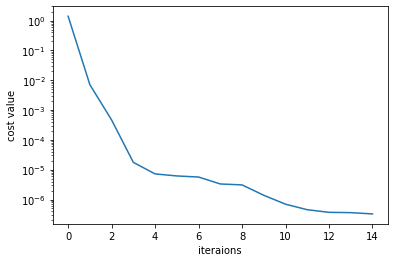





grad norm graph 



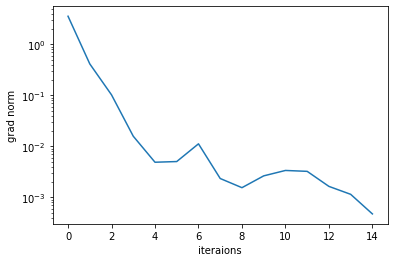





x position progression ,blue dot is solution [1,1]



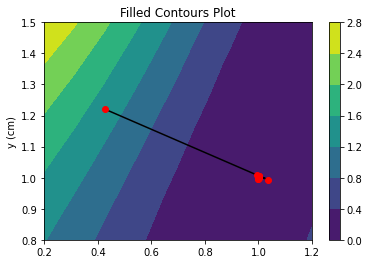

array([[1.00052773],
       [1.00127929]])

In [ ]:

NonelinearCG_FR_A1(tol = 1e-3,alpha_0 = 1,rho = 0.5,c = 0.01,x_0 = np.array([[-1.2],[1.]]))

**non linear CG_FR with rosenbrock A=100**

In [ ]:
def NonelinearCG_FR_A100(tol,alpha_0,rho,c,x_0):
  x = x_0
  
  gk = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
  pk = -gk
  k = 0 
  restart = 0
  
  call = 0
  cost = []
  norm = []
  x_pathx = []
  x_pathy = []
  counter = 0
  
  while LA.norm(gk) > tol:
    grad_f = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
    alpha = alpha_0
    
    while rosenbrock(100,x + alpha*(pk))  >  rosenbrock(100,x) + c*alpha*((grad_f.T)@(pk))  : 
      alpha = rho*alpha
  
      call  += 2
    
    x = x +  alpha*(pk)


    
    gk_plus1 = np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])


    beta_FR = ((gk_plus1.T)@(gk_plus1))/((gk.T)@(gk))
    
    #beta_FR = ((LA.norm(gk_plus1))/(LA.norm(gk))) 
    
    
    pk = -gk_plus1 + beta_FR * pk
    

    if pk.T @ gk_plus1 > 0 :
      
      restart +=1
      pk = -np.array([[400*(x[0,0]**3) - 400*x[0,0]*x[1,0] + 2*x[0,0] - 2],[200*x[1,0]-200*(x[0,0]**2)]])
  

    k = k + 1

    gk = gk_plus1
    


    cost.append(rosenbrock(100,x))
    norm.append(LA.norm(gk_plus1))
    x_pathx.append(x[0,0])
    x_pathy.append(x[1,0])
    
 
   
  print('function eval : ', call,'\n')

  print('x position after algrithm:', x,'\n')
  print('iter took :',k ,'\n')
  print('function valuve at x is :',rosenbrock(100,x),'\n')
  print('restart:',restart)

  print('\n')
  print('\n')



  print('grad norm graph \n')
  pyplot.yscale('log')
  plt.plot(norm)
  plt.ylabel('grad norm')
  plt.xlabel('iteraions')
  plt.show()


  print('cost value graph','\n')
  pyplot.yscale('log')
  plt.plot(cost)
  plt.ylabel('cost value')
  plt.xlabel('iteraions')
  plt.show()
  

  print('x position progression ,blue dot is solution [1,1]\n')
  

   



  xlist = np.linspace(-1.5, 2.5, 10)
  ylist = np.linspace(-1, 5, 10)
  X, Y = np.meshgrid(xlist, ylist)
  Z = 100*(Y-X**2)**2 + (1-(X))**2
  fig,ax=plt.subplots(1,1)
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  plt.plot(x_pathx,x_pathy,'k')
  plt.plot(x_pathx,x_pathy,'ro')
  plt.plot(1,1,'bo')
  
  plt.show()
  return x ,counter

function eval :  3602 

x position after algrithm: [[0.99980077]
 [0.99960068]] 

iter took : 150 

function valuve at x is : 3.977254389599024e-08 

restart: 1




grad norm graph 



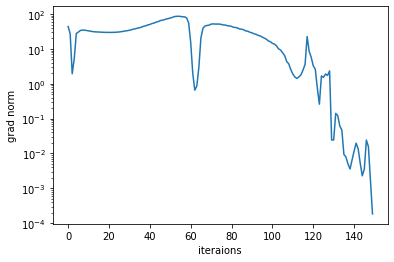

cost value graph 



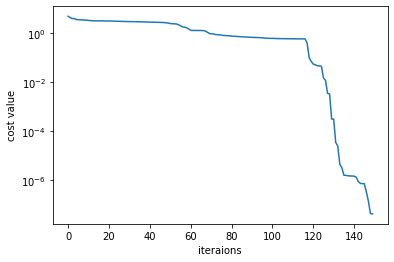

x position progression ,blue dot is solution [1,1]



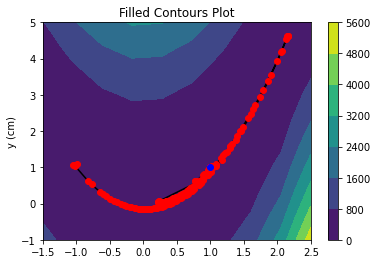

(array([[0.99980077],
        [0.99960068]]), 0)

In [ ]:
NonelinearCG_FR_A100(tol = 1e-3,alpha_0 = 1,rho = 0.5,c = 0.01,x_0 = np.array([[-1.2],[1]]))